In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("diabetes_dataset_with_notes.csv")
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


In [28]:
df.info()
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

,count,mean,std,min,25%,50%,75%,max
year,100000.0,2018.360820,1.345239,2015.00,2019.00,2019.00,2019.00,2022.00
age,100000.0,41.885856,22.516840,0.08,24.00,43.00,60.00,80.00
race:AfricanAmerican,100000.0,0.202230,0.401665,0.00,0.00,0.00,0.00,1.00
race:Asian,100000.0,0.200150,0.400114,0.00,0.00,0.00,0.00,1.00
race:Caucasian,100000.0,0.198760,0.399069,0.00,0.00,0.00,0.00,1.00
race:Hispanic,100000.0,0.198880,0.399160,0.00,0.00,0.00,0.00,1.00
race:Other,100000.0,0.199980,0.399987,0.00,0.00,0.00,0.00,1.00
hypertension,100000.0,0.074850,0.263150,0.00,0.00,0.00,0.00,1.00
heart_disease,100000.0,0.039420,0.194593,0.00,0.00,0.00,0.00,1.00
bmi,100000.0,27.320767,6.636783,10.01,23.63,27.32,29.58,95.69


In [29]:
pd.DataFrame({
    "DType": df.dtypes,
    "null_ratio": df.isnull().sum(),
    "nunique": df.nunique()
})

,DType,null_ratio,nunique
year,int64,0,7
gender,object,0,3
age,float64,0,102
location,object,0,55
race:AfricanAmerican,int64,0,2
race:Asian,int64,0,2
race:Caucasian,int64,0,2
race:Hispanic,int64,0,2
race:Other,int64,0,2
hypertension,int64,0,2


In [30]:
df = df.drop(['year', 'location','clinical_notes'], axis=1)
df['gender'].unique()
print(df['gender'].value_counts(normalize=True) * 100)


gender
Female    58.552
Male      41.430
Other      0.018
Name: proportion, dtype: float64


In [31]:
df['gender'] = df['gender'].replace("Other", np.nan)
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [32]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1}).fillna(-1).astype(int)
df['smoking_history'].unique()
print(df['smoking_history'].value_counts(normalize=True) * 100)


smoking_history
No Info        35.816
never          35.095
former          9.352
current         9.286
not current     6.447
ever            4.004
Name: proportion, dtype: float64


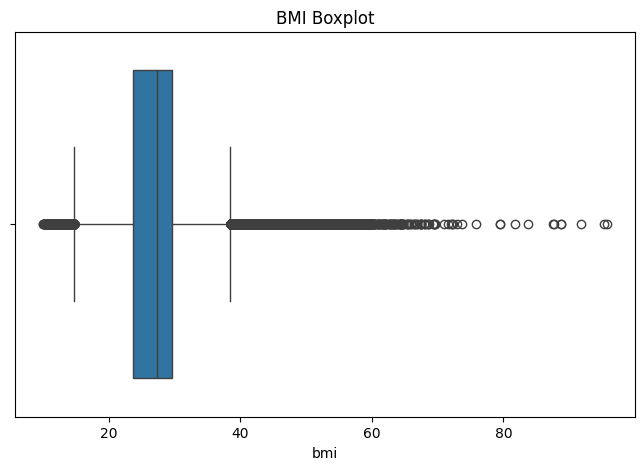

In [33]:
df = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)
plt.figure(figsize=(8,5))
sns.boxplot(x=df['bmi'])
plt.title("BMI Boxplot")
plt.show()

In [34]:
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
df = df[(df['bmi'] >= lower_bound) & (df['bmi'] <= upper_bound)]


Lower Bound: 14.705
Upper Bound: 38.504999999999995


C:\Users\Mohammed Hany\AppData\Local\Temp\ipykernel_26276\3254514074.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diabetes']==0]['age'], label="No Diabetes", shade=True)
C:\Users\Mohammed Hany\AppData\Local\Temp\ipykernel_26276\3254514074.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['diabetes']==1]['age'], label="Diabetes", shade=True)


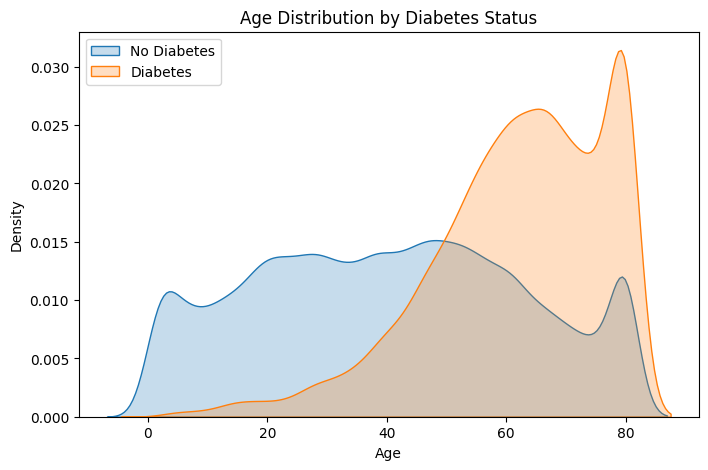

In [35]:
plt.figure(figsize=(8,5))
sns.kdeplot(df[df['diabetes']==0]['age'], label="No Diabetes", shade=True)
sns.kdeplot(df[df['diabetes']==1]['age'], label="Diabetes", shade=True)
plt.title("Age Distribution by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()

C:\Users\Mohammed Hany\AppData\Local\Temp\ipykernel_26276\3684814231.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='diabetes', y='age', data=df, ci=None, palette='Set1')
C:\Users\Mohammed Hany\AppData\Local\Temp\ipykernel_26276\3684814231.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='diabetes', y='age', data=df, ci=None, palette='Set1')


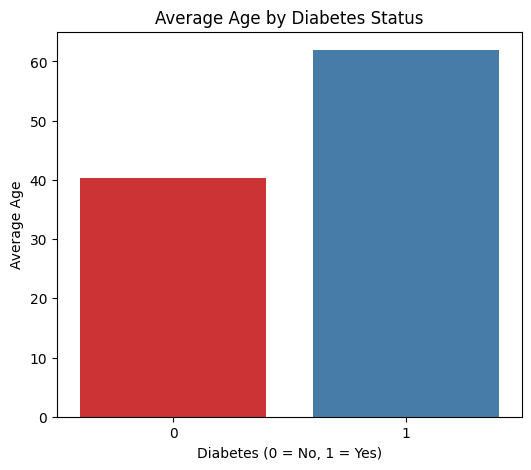

In [36]:
plt.figure(figsize=(6,5))
sns.barplot(x='diabetes', y='age', data=df, ci=None, palette='Set1')
plt.title("Average Age by Diabetes Status")
plt.xlabel("Diabetes (0 = No, 1 = Yes)")
plt.ylabel("Average Age")
plt.show()

In [37]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_standard = StandardScaler()
df[['bmi', 'hbA1c_level', 'blood_glucose_level','age']] = scaler_standard.fit_transform(df[['bmi', 'hbA1c_level', 'blood_glucose_level','age']])

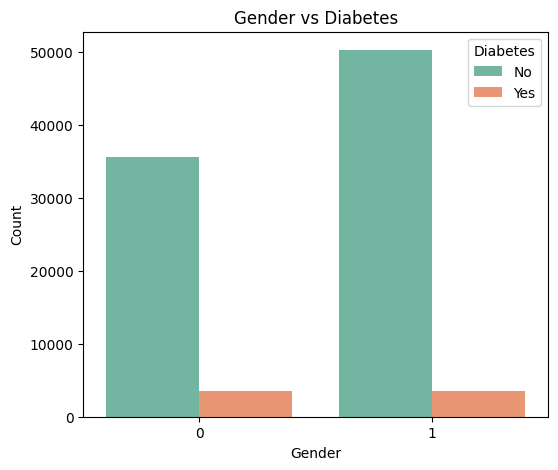

In [38]:
plt.figure(figsize=(6,5))
sns.countplot(x='gender', hue='diabetes', data=df, palette='Set2')
plt.title("Gender vs Diabetes")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Diabetes", labels=["No", "Yes"])
plt.show()

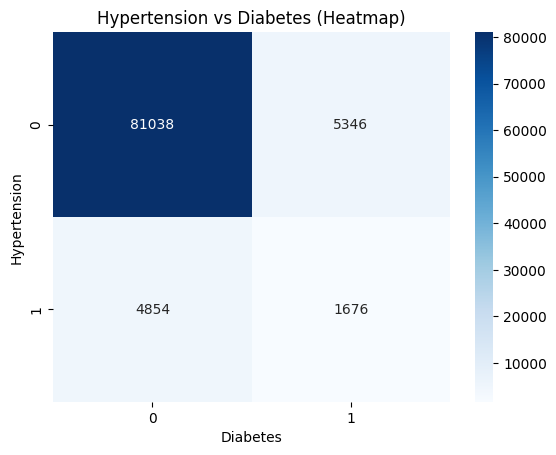

In [39]:
ct = pd.crosstab(df['hypertension'], df['diabetes'])
sns.heatmap(ct, annot=True, cmap="Blues", fmt="d")
plt.title("Hypertension vs Diabetes (Heatmap)")
plt.xlabel("Diabetes")
plt.ylabel("Hypertension")
plt.show()

In [40]:
print(df['diabetes'].value_counts(normalize=True) * 100)

diabetes
0    92.442474
1     7.557526
Name: proportion, dtype: float64


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# =======================
# 1) Split Data
# =======================
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# =======================
# 2) SMOTE
# =======================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("before SMOTE:", y_train.value_counts())
print("after SMOTE:", y_train_res.value_counts())

# =======================
# 3) Random Forest Model
# =======================
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train_res, y_train_res)

# =======================
# 4) Predict
# =======================
y_pred = model.predict(X_test)

# =======================
# 5) Metrics
# =======================
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


before SMOTE: diabetes
0    68713
1     5618
Name: count, dtype: int64
after SMOTE: diabetes
0    68713
1    68713
Name: count, dtype: int64

Accuracy: 0.9186353118441586

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.92      0.95     17179
           1       0.48      0.85      0.61      1404

    accuracy                           0.92     18583
   macro avg       0.73      0.89      0.78     18583
weighted avg       0.95      0.92      0.93     18583


Confusion Matrix:
 [[15881  1298]
 [  214  1190]]


In [42]:
import joblib
joblib.dump(model, "diabetes.pkl")
joblib.dump(scaler_standard, "scaler_diabetes.pkl")

['scaler_diabetes.pkl']